ML Project

In [22]:
import gradio as gr #for website making
import tensorflow as tf #TensorFlow is primarily used for building and training machine learning models, particularly deep learning models. It provides a comprehensive ecosystem of tools, libraries, and resources for various machine learning tasks, including: Neural Networks
import numpy as np #numeric python  for array manipulation,functions.

In [23]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [24]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

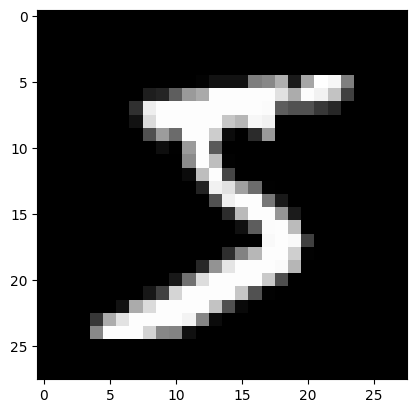

In [25]:


import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='grey')
plt.show()

In [26]:
x_train=x_train/255.0 #Normalize the input for  better training of  neural network or data
x_test=x_test/255.0 #if we didn't use normalization , the model may not predict and didn't have accuracy

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
x_train=x_train.reshape(-1,28,28,1) #reshaped in 28 rows and 28 columns
x_test=x_test.reshape(-1,28,28,1) # -1 is for how manys images are there in a set and 1 is for dimention  of the image of an array

In [29]:
#x_train[0]

In [30]:
#y_train[0]

In [31]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)


In [32]:
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [33]:
model=tf.keras.Sequential()  
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation= 'relu'))
model.add(tf.keras.layers.Dense(10,activation= 'softmax'))

c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8665 - loss: 0.4934 - val_accuracy: 0.9718 - val_loss: 0.0993
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9765 - loss: 0.0786 - val_accuracy: 0.9795 - val_loss: 0.0700
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9847 - loss: 0.0530 - val_accuracy: 0.9837 - val_loss: 0.0537
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9851 - val_loss: 0.0517
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9924 - loss: 0.0267 - val_accuracy: 0.9841 - val_loss: 0.0582
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9959 - loss: 0.0152 - val_accuracy: 0.9861 - val_loss: 0.0504
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9972 - loss: 0.0106 - 

In [37]:
accuracy=model.evaluate(x_test, y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0609


[0.04905037209391594, 0.9872000217437744]

In [40]:
def sketch_recognition(img):
    #x=model.predict(img.reshape(1,28,28)).argmax(axis=1)
    x=model.predict(img).argmax(axis=1)
    return x

In [42]:
import numpy as np

def classify(image):
  image = np.expand_dims(image, axis=0)
  prediction = model.predict(image).tolist()[0]
  return {str(i):prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, 'sketchpad', label, capture_session=True,interpretation="default",title = 'Digit Classifier')
interface.launch(debug=True)

AttributeError: module 'gradio' has no attribute 'outputs'

In [41]:
interface=gr.Interface(fn=sketch_recognition,
                       inputs="sketchpad",outputs='text')
interface.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\gradio\route_utils.py", line 261, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\gradio\blocks.py", line 1786, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\gradio\blocks.py", line 1338, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shrut\OneDrive\Desktop\Python\venv\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
  

Keyboard interruption in main thread... closing server.


In [39]:
#interface=gr.Interface(fn=sketch_recognition,inputs="sketchpad",outputs='text')
#interface.launch(debug=True)



Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
